# Lab | Matplotlib & Seaborn (Challenge 3)

#### Import all the libraries that are necessary.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Challenge 3

#### Open the titanic file. Name your dataset titanic.

Download the dataset from [here](https://drive.google.com/file/d/1jkkOcWm9aEF8gb0r2SsarF5Qdoaaw1do/view?usp=sharing) and place it in the data folder

In [2]:
titanic = pd.read_csv('data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [3]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
Hint: Use Pandas select_dtypes

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


In [5]:
# Numerical variables: 
titanic.select_dtypes(include=['float64', 'int64']).head(1)

# PassengerId (only identifier), Survived(0/1), Pclass (only 3) are numerical, but I would say they are categorical
# SibSp, Parch also a few numbers so would say that they are categorical as well

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.25


In [6]:
# Numerical variables: 
titanic.select_dtypes(exclude=['float64', 'int64']).head(1)

# Gender, Embarked categorical + ones mentioned above
# Name, Ticket, Cabin - not really variables

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S


#### Set the plot style to classic and the figure size to (12,6).
Hint: To set the style you can use matplotlib.pyplot functions or seaborn 

In [21]:
#paolo: ok also just -this would be enough to check the types
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#seaborn.set_style(style=None, rc=None)¶
# Plot style change
plt.style.use("classic")

# Figure size change
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of the column Age.

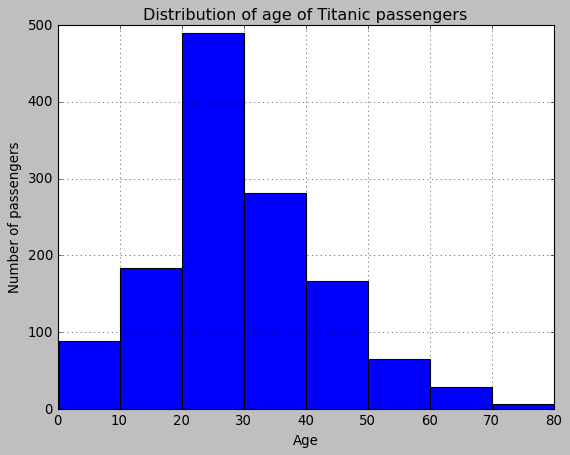

In [8]:
# example code: time_grades['Grade'].hist(bins=10)

# Pandas plots are based on matplotlib

# Plot the histogram of column Age
titanic['Age'].hist(bins = 8) 
#choose 8 bins because oldest age = 80 >> titanic.Age.max()

# Set titles, labels, etc
plt.title('Distribution of age of Titanic passengers')
plt.xlabel('Age')
plt.ylabel('Number of passengers')

# Show the plot
plt.show()

#most titanic passengers were between 20-40

#### Use subplots and plot the distribution of the Age variable with bins equal to 10, 20 and 50.

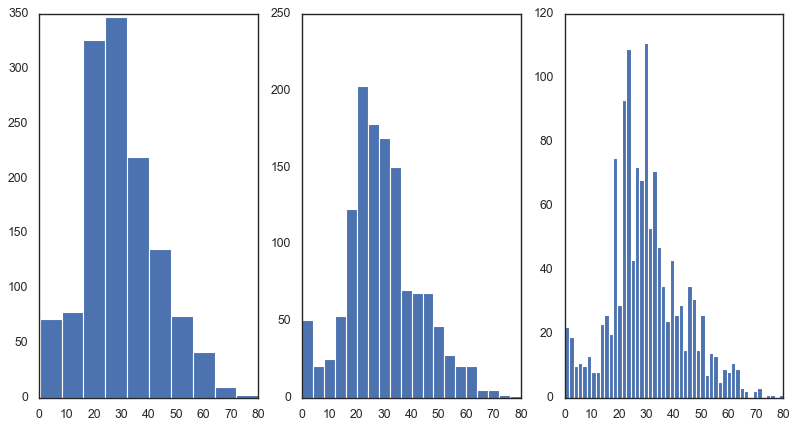

In [24]:
# Create a figure of a fixed size and axes
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

# Plot the histogram using a different number of bins
ax[0].hist(titanic['Age'], bins=10)
ax[1].hist(titanic['Age'], bins=20)
ax[2].hist(titanic['Age'], bins=50); #paolo: adding ";" check difference with or without

# I like previous one the best...
#paolo: :) ok you see before the plot you have a print out
# of the arrays. If you add ";" at the end of the last line above
# you can skip it

#### How does the bin size affect your plot? Comment.

~~~~
Using a low number of bins (wider bins) reduces noise on the distribution estimation while using a 
high number of bins (narrower bins) gives greater precision to the distribution estimation (and more noise). 
~~~~

#### Use seaborn to show the distribution of the column Age.

<AxesSubplot:xlabel='Age'>

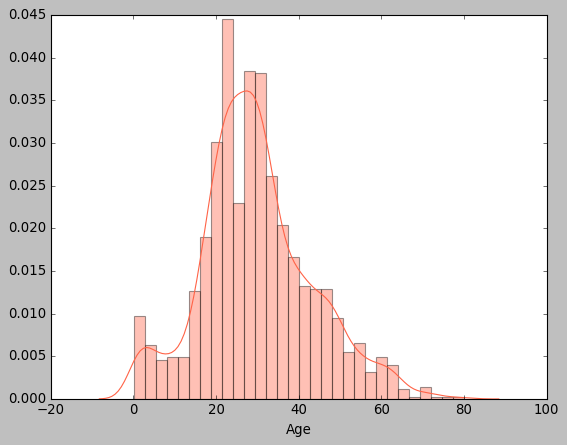

In [10]:
# Seaborn is a Python library based on matplotlib

# Plot of the age histogram using seaborn
sns.distplot(titanic['Age'], color = 'tomato')

# Show the plot


#### Use the right plot to visualize the column Gender. There are 2 ways of doing it. Do it both ways.
Hint: Use matplotlib and seaborn

        PassengerId
Gender             
female          466
male            843




<Figure size 640x480 with 0 Axes>

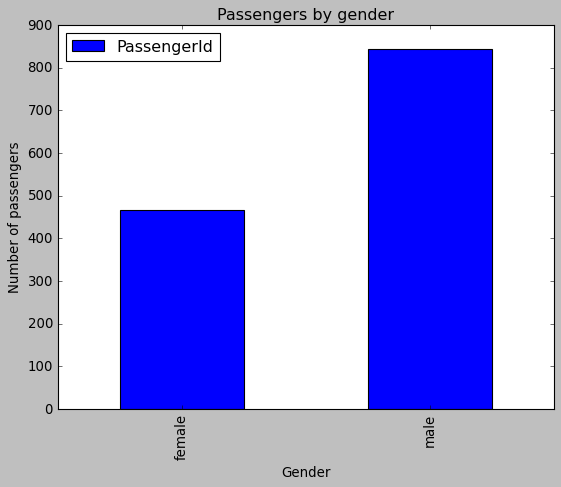

In [11]:
# OPTION 1 - Matplotlib

genders = titanic.pivot_table(values = 'PassengerId', index = 'Gender', aggfunc = 'count')
print(genders)
print('\n')

# Bar plot of the gender
plt.figure()
genders.plot.bar()

# Add labels to the plot and change xticks rotation
plt.title('Passengers by gender')
plt.ylabel('Number of passengers')
plt.xlabel('Gender')

# Show the plot
plt.show()

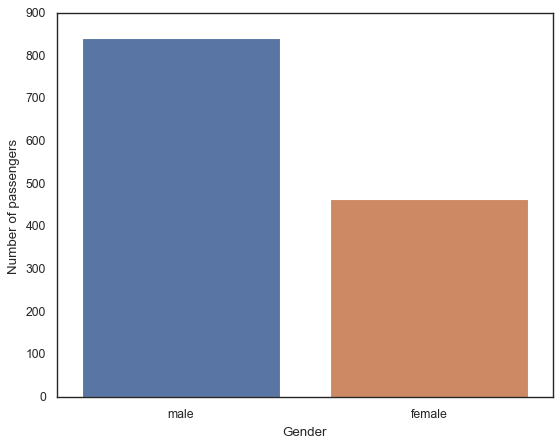

In [12]:
# Seaborn Countplot
# count plot on single categorical variable 
sns.set(style = 'white')
sns.countplot(x ='Gender', data = titanic) 
plt.ylabel('Number of passengers')

# Show the plot
plt.show() 

#### Use the right plot to visualize the column Pclass.

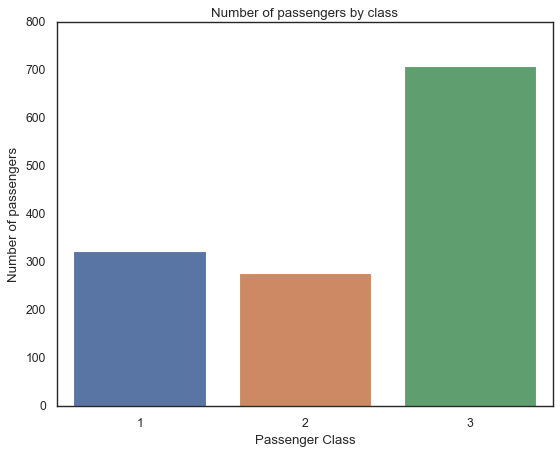

In [13]:
# Bar plot of Pclass
sns.countplot(x = 'Pclass', data = titanic)

# Add labels to the plot and change xticks rotation
plt.title('Number of passengers by class')
plt.ylabel('Number of passengers')
plt.xlabel('Passenger Class')

# Show the plot
plt.show()

#### We would like to have in one single plot the summary statistics of the feature Age. What kind of plot would you use?

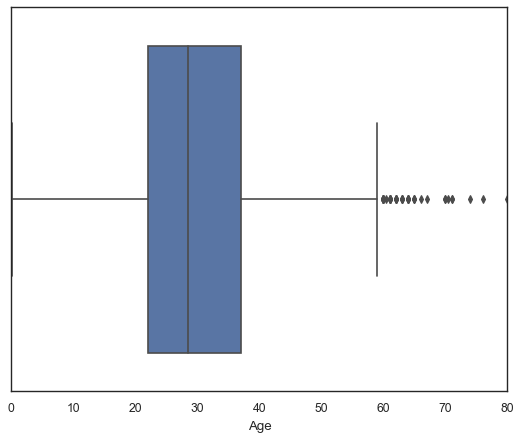

In [14]:
# Box plot
sns.boxplot(x = titanic['Age'])

# Show the plot
plt.show()

#### What does the last plot tells you about the feature Age? Comment.

~~~~
The statistics that you can get from the boxplot are the minimum, first quartile, median, 
third quartile, and maximum.

The red line shows us the median of Age. 
The blue box shows us the interquartile range (from Q1 to Q3).
It also shows us the outliers, which are out of the maximum and minimum range (Q1 - 1.5*IQR, Q3 + 1.5*IQR).
~~~~

#### Now in addition to the summary statistics, we want to have in the SAME plot the distribution of Age. What kind of plot would you use?

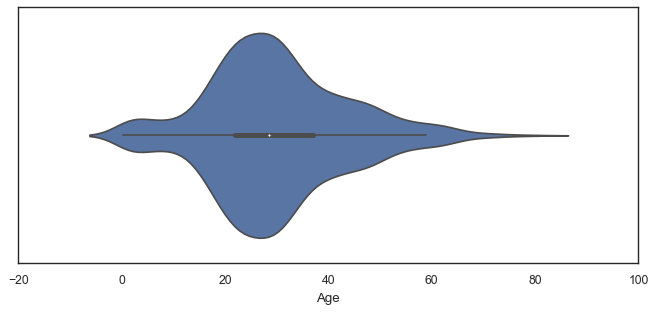

In [15]:
# Set figure size
plt.figure(figsize=(10,4))

# Violin plot
sns.violinplot(x = titanic['Age'])

# Show the plot
plt.show()

#### What additional information the last plot provides you about the feature Age? Comment.

~~~~
This plot is a combination of a boxplot and a density plot. The violin plot features a kernel density estimation 
of the underlying distribution of the data.

The black central part of the plot is the same as a boxplot and the white dot is the median.
The blue part is the distribution of the data.
~~~~

#### We suspect that there is a linear relationship between Fare and Age. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
Hint: One of the ways involves using Seaborn.

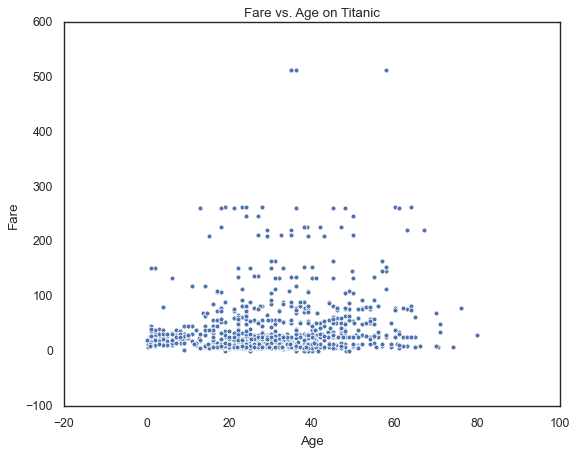

In [16]:
# OPTION 1

# Scatter plot
sns.scatterplot(y = 'Fare', x = 'Age', data = titanic)

# Add labels
plt.title('Fare vs. Age on Titanic')

# Show the plot
plt.show()

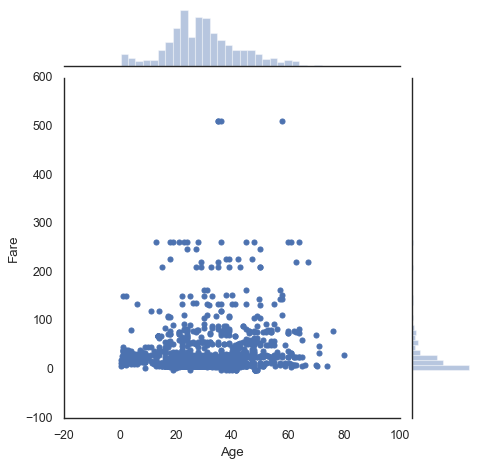

In [17]:
# OPTION 2

# Joinplot
sns.jointplot(y = 'Fare', x = 'Age', data = titanic)

# Show the plot
plt.show()

#### Using Seaborn plot the correlation matrix.

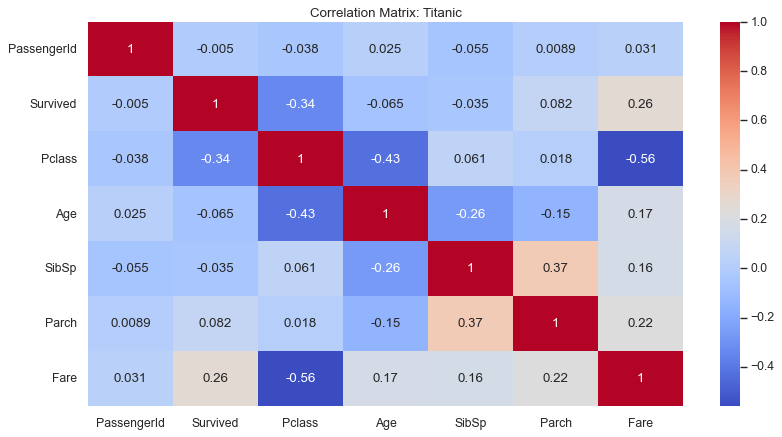

In [18]:
# Set figure size
plt.figure(figsize = (12,6))

# Correlation matrix
sns.heatmap(titanic.corr(), cmap = 'coolwarm', annot = True)
# learned the annot trick of Aline :)

# Add title
plt.title('Correlation Matrix: Titanic')

# Show plot
plt.show()
#paolo: nice youse of annotation

#### What are the most correlated features? Comment.

~~~~~
The most correlated features are Parch and SibSp.
~~~~~

#### Use the right plot to display the summary statistics of the Age in function of the Pclass.

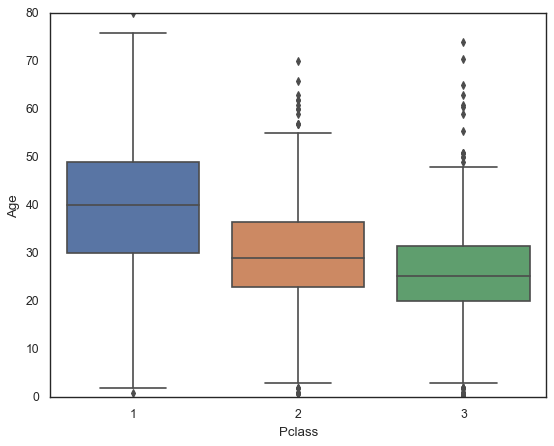

In [19]:
# Boxplot
sns.boxplot(x = titanic['Pclass'], y = titanic['Age'])

# Show the plot
plt.show()

#### Use the seaborn to plot the distribution of the Age based on the Gender.
Hint: Use Facetgrid

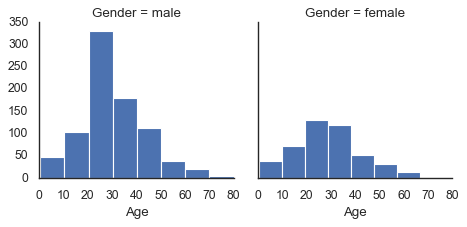

In [20]:
# Create a grid with FacetGrid
grid = sns.FacetGrid(titanic,  col = 'Gender')

# Draw a plot on each facet
grid.map(plt.hist, 'Age', bins = 8)
# again used 8 bins, so above

# Show the plot
plt.show()

In [ ]:
#paolo: yes, great lab!